# 第一週 資料預處理與基本視覺化

# 課堂講授

### 使用到的packages
conda install -c anaconda pandas

conda install -c anaconda numpy

conda install -c conda-forge matplotlib

conda install -c anaconda seaborn

### 安裝完後，要把packages導入到此文件中

In [1]:
## 載入套件
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import numpy as np
import matplotlib.pyplot as plt
import os

# 基本作圖語法

In [2]:
# 於Jupyter notebook中即時顯示作圖結果
%matplotlib inline

# 如在py檔中
# 則使用plt.show()指令將作圖結果秀出

## plt.figure() 畫布物件
「The top level container for all the plot elements」。

In [3]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

## plt.axes() 軸物件
畫圖的根本物件

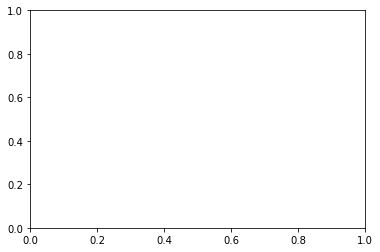

In [4]:
ax = plt.axes()

## .plot(x,y) 畫2D圖

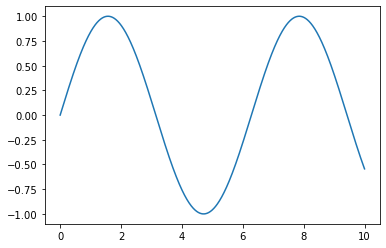

In [5]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
y = np.sin(x)

ax.plot(x, y);

## 同張圖畫出多個結果

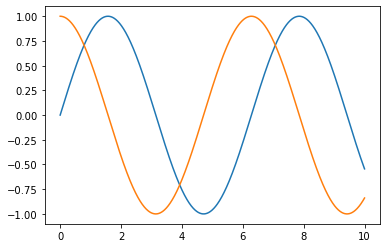

In [6]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
y_sin = np.sin(x)
y_cos = np.cos(x)

ax.plot(x, y_sin)
ax.plot(x, y_cos)

## .plot(x,y, color='顏色', linestyle='樣式') 為線段加上顏色樣式
https://matplotlib.org/stable/gallery/color/named_colors.html
<br/>
https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html

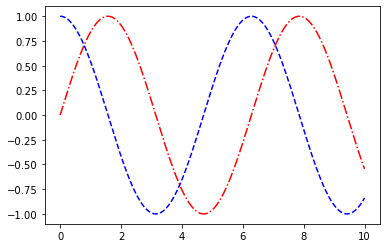

In [7]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
y_sin = np.sin(x)
y_cos = np.cos(x)

ax.plot(x, y_sin, color='red', linestyle='dashdot');
ax.plot(x, y_cos, color='blue', linestyle='dashed');

## 加上標籤: 
## ax.set_xlabel('文字') X軸標籤
## ax.set_ylabel('文字') Y軸標籤
## ax.set_title('文字')圖片標題

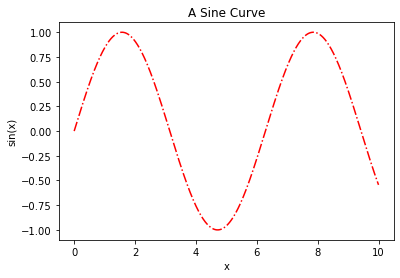

In [8]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
y_sin = np.sin(x)

ax.set_title("A Sine Curve")
ax.set_xlabel('x')
ax.set_ylabel('sin(x)')
ax.plot(x, y_sin, color='red', linestyle='dashdot');

## 圖標籤 ax.plot(label='文字') + plt.legend()

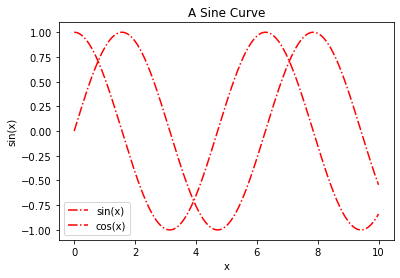

In [9]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
y_sin = np.sin(x)
y_cos = np.cos(x)

ax.set_title("A Sine Curve")
ax.set_xlabel('x')
ax.set_ylabel('sin(x)')
ax.plot(x, y_sin, color='red', linestyle='dashdot', label='sin(x)');
ax.plot(x, y_cos, color='red', linestyle='dashdot', label='cos(x)');

plt.legend()

## 同時顯示複數個圖

### plt.figure().add_subplot(列, 行, 序號)

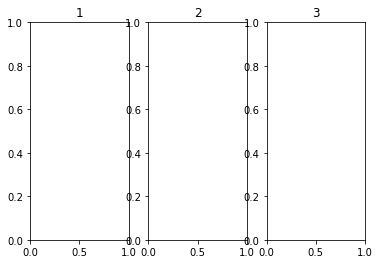

In [10]:
fig = plt.figure()

# 1x3的矩陣的第1個位置中設定axes
ax_1 = fig.add_subplot(1, 3, 1)
ax_1.set_title('1')

# 1x3的矩陣的第2個位置中設定axes
ax_2 = fig.add_subplot(1, 3, 2)
ax_2.set_title('2')

# 1x3的矩陣的第3個位置中設定axes
ax_3 = fig.add_subplot(1, 3, 3)
ax_3.set_title('3')

plt.show()

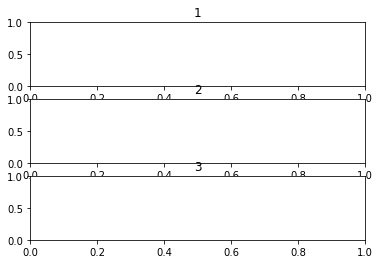

In [11]:
fig = plt.figure()

# 1x3的矩陣的第1個位置中設定axes
ax_1 = fig.add_subplot(3, 1, 1)
ax_1.set_title('1')

# 1x3的矩陣的第2個位置中設定axes
ax_2 = fig.add_subplot(3, 1, 2)
ax_2.set_title('2')

# 1x3的矩陣的第3個位置中設定axes
ax_3 = fig.add_subplot(3, 1, 3)
ax_3.set_title('3')

plt.show()

#### matplotlib還有很多種圖形，大家可以各自摸索一下
https://matplotlib.org/stable/plot_types/index

# 資料預處理實例演練

### Kaggle公開資料庫，裡面有各式各樣的資料集，有興趣的同學可以多多研究
https://www.kaggle.com/

### 此堂課中，我們會使用下列網址的資料集
https://www.kaggle.com/datasets/ayessa/salary-prediction-classification

In [12]:
## 載入資料
salary_path = os.path.join('.', 'Datasets', 'Salary Prediction', 'salary.csv')
salary_df = pd.read_csv(salary_path)

In [13]:
## 看看資料裡有多少樣本與變項
salary_df.shape

(32561, 15)

In [14]:
## 瞭解資料型態
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [15]:
## 看看資料長什麼樣子
salary_df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [16]:
# 簡單資料統計描述
salary_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [17]:
# 簡單資料統計描述(全體)
salary_df.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


### 接著，我們對資料集做探索式資料分析(Exploratory Data Analysis, EDA)，首先要先把變數分類

In [18]:
cate_col = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
cont_col = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

### 發現缺失值

In [19]:
# occupation多一類(14 ->15), workclass也是？？？
print(salary_df.occupation.unique())
print(salary_df.workclass.unique())

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


In [20]:
## 轉換缺失值，缺失值在此資料集中以?表示(可從Data Set Description中得知)
salary_df[salary_df=="?"] = np.nan

In [21]:
# 再看看資料實際的狀況
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### 處理缺失值
首先我們要先確認有缺失值的變數為連續變數亦或是類別變數

此例中，三個有缺失值的變數皆為類別變數，加上缺失值比例不高，我們通常不會差補類別變數之缺失值，但此為教學，下列將示範如何用__眾數__做差補

In [22]:
## 確認缺失值數量
salary_df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [23]:
## 差補類別缺失值
for i in cate_col:
    salary_df[i] = salary_df[i].fillna(salary_df[i].mode()[0]) #[0]要寫出來，以取得標籤值

In [24]:
## 再次確認缺失值的數量
salary_df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

### 離群值處理

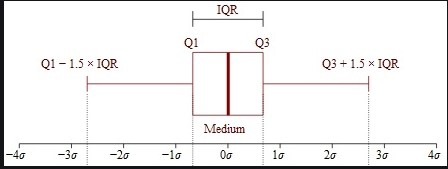

In [25]:
# 對連續變數做預處理 (把離群值刪掉)
for i in salary_df[cont_col]:
    upper_limit = salary_df[i].mean() + (2 * salary_df[i].std())
    lower_limit = salary_df[i].mean() - (2 * salary_df[i].std())
    salary_df[i][(salary_df[i] > upper_limit) | (salary_df[i] < lower_limit)] = np.nan # 正負兩個標準差以外的皆為離群值

In [26]:
# 確認各個連續變數有多少個被刪掉的離群值
salary_df.isna().sum()

age               1158
workclass            0
fnlwgt            1249
education            0
education-num     1611
marital-status       0
occupation           0
relationship         0
race                 0
sex                  0
capital-gain       255
capital-loss      1485
hours-per-week    2203
native-country       0
salary               0
dtype: int64

In [27]:
# 把被刪掉的離群值做差補 (我們可以用平均值、中位數等等來做差補) 
salary_df[cont_col] = salary_df[cont_col].fillna(salary_df[cont_col].mean()) #  mean或median不需要[0]，但mode需要

In [28]:
# 確認是否還有缺失值
salary_df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [29]:
# 確認資料型態
salary_df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.000000,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.786811,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.000000,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.000000,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.000000,Cuba,<=50K
5,37.0,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.000000,United-States,<=50K
6,49.0,Private,160187.0,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.000000,Jamaica,<=50K
7,52.0,Self-emp-not-inc,209642.0,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.000000,United-States,>50K
8,31.0,Private,45781.0,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.000000,United-States,>50K
9,42.0,Private,159449.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.000000,United-States,>50K


In [30]:
# 沒問題的話，存csv，用作下周課程的資料集
salary_save = os.path.join('.', 'Datasets', 'Salary Prediction', 'salary_cleaned.csv')
salary_df.to_csv(salary_save, index=False)

# 基本視覺化

### 類別變數

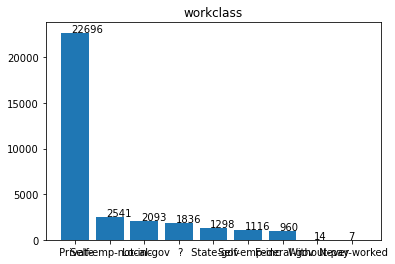

In [31]:
fig = plt.figure()
ax = plt.axes()

ticks = salary_df['workclass'].value_counts().index
counts = salary_df['workclass'].value_counts()

ax.bar(ticks, counts)
ax.set_title('workclass')
for i in range(len(ticks)):
    #ax.annotate(數字, (x軸的位置, y軸的位置))
    ax.annotate(counts[i], (i-0.1, counts[i]+100))

C:\Users\gopl0\AppData\Local\Temp\ipykernel_9400\3881988170.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right', rotation_mode='anchor')


[Text(0, 0, ' Private'),
 Text(1, 0, ' Self-emp-not-inc'),
 Text(2, 0, ' Local-gov'),
 Text(3, 0, ' ?'),
 Text(4, 0, ' State-gov'),
 Text(5, 0, ' Self-emp-inc'),
 Text(6, 0, ' Federal-gov'),
 Text(7, 0, ' Without-pay'),
 Text(8, 0, ' Never-worked')]

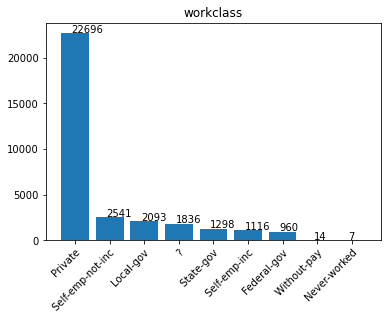

In [32]:
fig = plt.figure()
ax = plt.axes()

ticks = salary_df['workclass'].value_counts().index
labels = salary_df['workclass'].value_counts().index.tolist()
counts = salary_df['workclass'].value_counts()


ax.bar(ticks, counts)
ax.set_title('workclass')

for i in range(len(ticks)):
    ax.annotate(counts[i], (i-0.1, counts[i]+100))
ax.set_xticklabels(labels, rotation=45, ha='right', rotation_mode='anchor')

### 連續變數

#### 分布曲線

Text(0.5, 1.0, 'age')

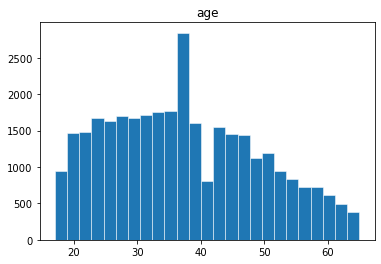

In [33]:
fig = plt.figure()
ax = plt.axes()
ax.hist(salary_df['age'], bins = 25, linewidth=0.5, edgecolor="white")
ax.set_title('age')

# 進階資訊視覺化

## seaborn介紹
https://seaborn.pydata.org/examples/index.html

In [34]:
import seaborn as sns

## 相關係數圖

In [35]:
round(salary_df.corr(),3)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000,-0.055,0.109,0.110,0.014,0.168
fnlwgt,-0.055,1.000,-0.016,0.005,0.001,-0.022
education-num,0.109,-0.016,1.000,0.139,-0.000,0.159
capital-gain,0.110,0.005,0.139,1.000,-0.008,0.100
capital-loss,0.014,0.001,-0.000,-0.008,1.000,0.003
hours-per-week,0.168,-0.022,0.159,0.100,0.003,1.000


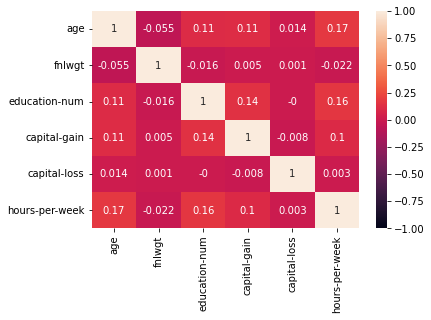

In [36]:
sns.heatmap(round(salary_df.corr(),3), vmin=-1, vmax=1, annot=True) #vmin, vmax: Values to anchor the colormap,
plt.show()

C:\Users\gopl0\AppData\Local\Temp\ipykernel_9400\1303698361.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(salary_df.corr(), dtype=np.bool))


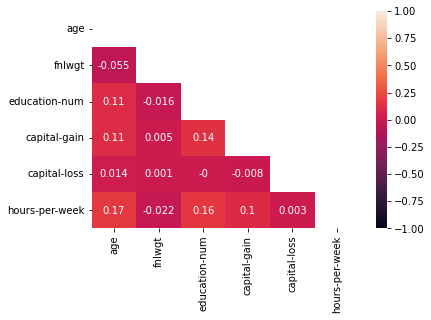

In [37]:
# np.triu: upper triangle of an array
# np.tril: lower triangle of an array
mask = np.triu(np.ones_like(salary_df.corr(), dtype=np.bool))
sns.heatmap(round(salary_df.corr(),3), vmin=-1, vmax=1, annot=True, mask = mask)
plt.show()

## Violin Plot

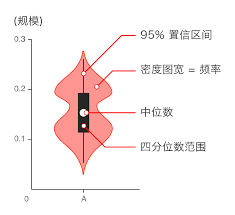

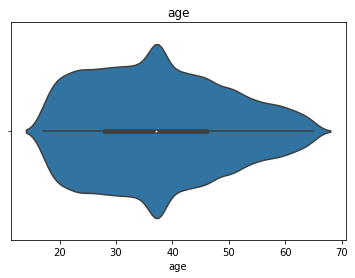

In [38]:
sns.violinplot(x = salary_df['age'])
plt.title('age')
plt.show()

## Box Plot

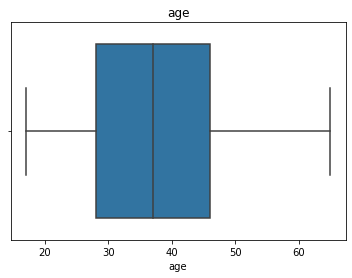

In [39]:
sns.boxplot(x = salary_df['age'])
plt.title('age')
plt.show()

### seaborn可以輕易做出多變項視覺化成果(matplotlib也可以，但寫起來會複雜許多)

#### 各種族的年齡分布

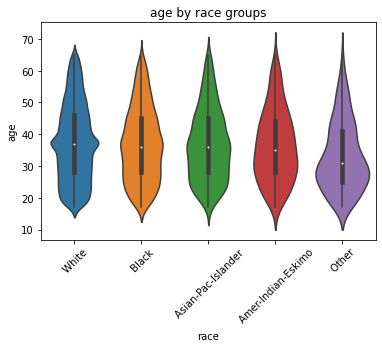

In [40]:
fig = plt.figure()
ax = sns.violinplot(y = salary_df['age'], x = salary_df['race'])
ax.set_title('age by race groups')
ax.tick_params(axis='x', rotation=45)
plt.show()

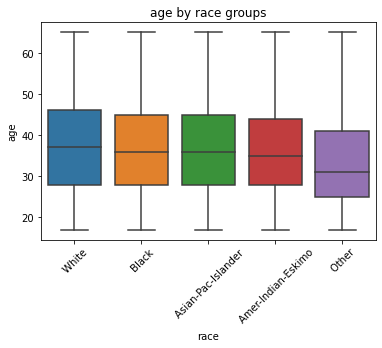

In [41]:
fig = plt.figure()
ax = sns.boxplot(y = salary_df['age'], x = salary_df['race'])
ax.set_title('age by race groups')
ax.tick_params(axis='x', rotation=45)
plt.show()

#### 各種族的男女各別年齡分布

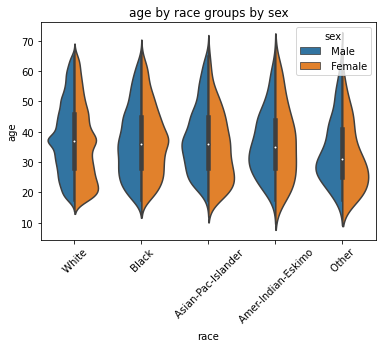

In [42]:
fig = plt.figure()
ax = sns.violinplot(y = salary_df['age'], x = salary_df['race'], hue = salary_df['sex'], split=True)
ax.set_title('age by race groups by sex')
ax.tick_params(axis='x', rotation=45)
plt.show()

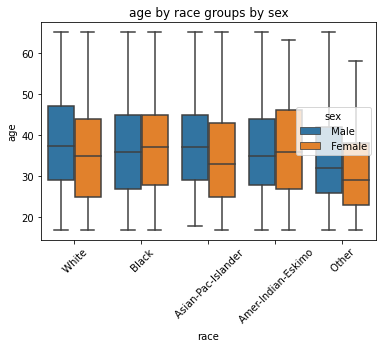

In [43]:
fig = plt.figure()
ax = sns.boxplot(y = salary_df['age'], x = salary_df['race'], hue = salary_df['sex'])
ax.set_title('age by race groups by sex')
ax.tick_params(axis='x', rotation=45)
plt.show()

#### Joint plot

<Figure size 432x288 with 0 Axes>

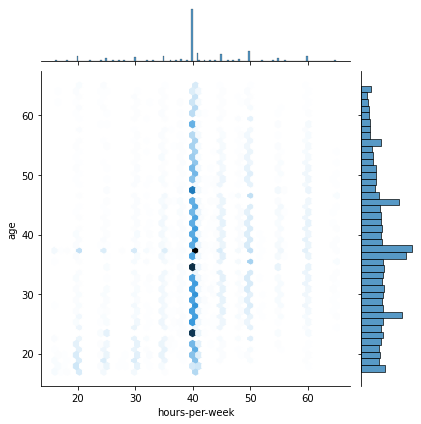

In [44]:
fig = plt.figure()
ax = sns.jointplot(x=salary_df['hours-per-week'], y=salary_df['age'], kind="hex") #hex 六邊形
plt.show()


#### 投資收入、工作時數、種族與性別的關係

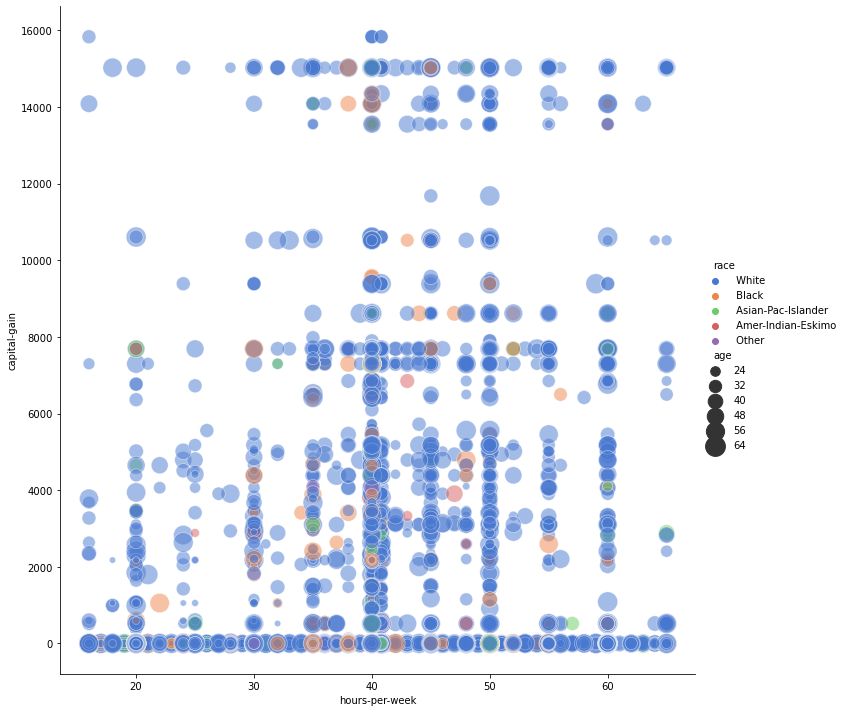

In [45]:
sns.relplot(x=salary_df['hours-per-week'], y=salary_df['capital-gain'], hue=salary_df['race'], size=salary_df['age'],
            sizes=(40, 400), alpha=.5, palette="muted", height=10)
plt.show()

# 上機練習

請使用下列網頁的資料集 (Heart Attack Analysis & Prediction Dataset)

https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

### 載入所需套件

In [46]:
## 載入套件
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

### 讀檔、查看前10筆資料

In [47]:
heart_path=os.path.join('.','Datasets','Heart attack','heart.csv')
ha_df1=pd.read_csv(heart_path)

ha_df1.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1
5,57,1,0,140,192,0,1,148,0,0,1
6,56,0,1,140,294,0,0,153,0,0,1
7,44,1,1,120,263,0,1,173,0,0,1
8,52,1,2,172,199,1,1,162,0,0,1
9,57,1,2,150,168,0,1,174,0,0,1


### 查看資料型態

In [48]:
ha_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trtbps    303 non-null    int64
 4   chol      303 non-null    int64
 5   fbs       303 non-null    int64
 6   restecg   303 non-null    int64
 7   thalachh  303 non-null    int64
 8   exng      303 non-null    int64
 9   caa       303 non-null    int64
 10  output    303 non-null    int64
dtypes: int64(11)
memory usage: 26.2 KB


### 資料型態不如預期...

#### 先將欄位進行分類

In [49]:
cate_col = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'caa']
cont_col = ['age', 'trtbps', 'chol', 'thalachh']

#### 轉換資料型態

In [50]:
ha_df1[cate_col] = ha_df1[cate_col].astype(str)
ha_df1[cont_col] = ha_df1[cont_col].astype(float)

#### 再次查看資料型態

In [51]:
ha_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trtbps    303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalachh  303 non-null    float64
 8   exng      303 non-null    object 
 9   caa       303 non-null    object 
 10  output    303 non-null    int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 26.2+ KB


## 連續變數中，值不在正負1.5IQR的為離群值;類別變數中，不在codebook中的值要以空值取代

### 連續變數例外值處理

In [52]:
for i in cont_col:
    q1=ha_df1[i].quantile(0.25)
    q3=ha_df1[i].quantile(0.75)
    iqr=q3-q1
    inner_fence=1.5*iqr

    inner_fence_low=q1-inner_fence
    inner_fence_upp=q3+inner_fence
    ha_df1[i][(ha_df1[i]<inner_fence_low) | (ha_df1[i]>inner_fence_upp)]=np.nan

### 查看處理後資料有多少空值

In [53]:
ha_df1[cate_col].isna().sum()

sex        0
cp         0
fbs        0
restecg    0
exng       0
caa        0
dtype: int64

### 類別變數例外值處理

In [54]:
ha_df1["sex"][~ha_df1["sex"].isin(["0","1"])] = np.nan # ~為not，之前已把此些變數變為str，所以要加引號，不然讀取不到
ha_df1["cp"][~ha_df1["cp"].isin(["0","1","2","3"])] = np.nan
ha_df1["fbs"][~ha_df1["fbs"].isin(["0","1"])] = np.nan
ha_df1["restecg"][~ha_df1["restecg"].isin(["0","1","2"])] = np.nan
ha_df1["exng"][~ha_df1["exng"].isin(["0","1"])] = np.nan
ha_df1["caa"][~ha_df1["caa"].isin(["0","1","2","3"])] = np.nan

### 查看處理後資料有多少空值

In [55]:
ha_df1[cate_col].isna().sum()

sex        0
cp         0
fbs        0
restecg    0
exng       0
caa        5
dtype: int64

## 用中位數差補被截斷的離群值;用眾數差補被截斷的類別變數的值

### 連續值補值

In [56]:
for i in cont_col:
    ha_df1[i]=ha_df1[i].fillna(ha_df1[i].median())

In [57]:
# 確認連續變數是否還有缺失值
ha_df1[cont_col].isna().sum()

age         0
trtbps      0
chol        0
thalachh    0
dtype: int64

### 類別值補值

In [58]:
for i in cate_col:
    ha_df1[i]=ha_df1[i].fillna(ha_df1[i].mode()[0])

In [59]:
# 確認類別變數是否還有缺失值
ha_df1[cate_col].isna().sum()

sex        0
cp         0
fbs        0
restecg    0
exng       0
caa        0
dtype: int64

## 劃出連續變數的相關係數Heat map

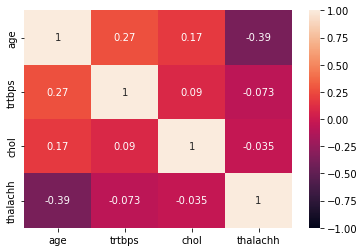

In [60]:
sns.heatmap(round(ha_df1[cont_col].corr(),3),vmin=-1,vmax=1,annot=True)
plt.show()

## 畫出男女分布圓餅圖

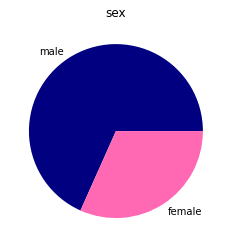

In [61]:
plt.pie(ha_df1["sex"].value_counts(),labels=["male","female"],colors=["navy","hotpink"])
plt.title("sex")
plt.show()